# Ludwig Visualization Demonstration

In [1]:
import warnings
warnings.simplefilter('ignore')
from ludwig.api import LudwigModel
from ludwig.visualize import compare_performance,  compare_classifiers_performance_from_pred, \
    confusion_matrix
from ludwig.utils.data_utils import load_json
import pandas as pd
import os
import os.path

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



## Prepare test data set for use

In [2]:
# create test dataframe
test_data = {'image_path': [], 'label': []}
current_dir = os.getcwd()
test_dir = os.path.join(current_dir, 'data', 'mnist_png', 'testing')
for label in os.listdir(test_dir):
    files = os.listdir(os.path.join(test_dir, label))
    test_data['image_path'] += [os.path.join(test_dir, label, f) for f in files]
    test_data['label'] += len(files) * [label]

# collect data into a data frame
test_df = pd.DataFrame(test_data)
print(test_df.head())

                                          image_path label
0  /opt/project/examples/mnist/data/mnist_png/tes...     9
1  /opt/project/examples/mnist/data/mnist_png/tes...     9
2  /opt/project/examples/mnist/data/mnist_png/tes...     9
3  /opt/project/examples/mnist/data/mnist_png/tes...     9
4  /opt/project/examples/mnist/data/mnist_png/tes...     9


## Generate predictions the test data set for the different neural network options

In [3]:
# get list of models to visualize results
models_list = ['Option1', 'Option2', 'Option3']
test_stats_list = []
preds_list = []

for m in models_list:
    # retrieve a trained model
    model = LudwigModel.load('./results/multiple_experiment_'+ m + '/model')

    # make predictions
    pred_df, test_stats = model.test(data_df=test_df)
    
    # collect test statsitics
    preds_list.append(pred_df['label_predictions'].astype('int'))
    test_stats_list.append(test_stats)


Instructions for updating:
Use keras.layers.dropout instead.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./results/multiple_experiment_Option1/model/model_weights
INFO:tensorflow:Restoring parameters from ./results/multiple_experiment_Option2/model/model_weights
INFO:tensorflow:Restoring parameters from ./results/multiple_experiment_Option3/model/model_weights


## Show model performance on test data set

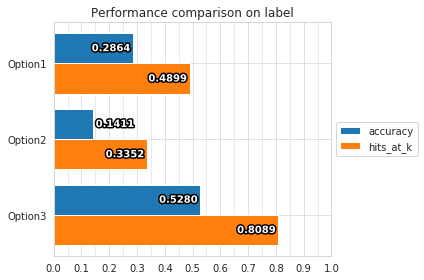

In [4]:
# overall model performance
compare_performance(
  test_stats_list,
  'label',
  model_names=models_list,
  output_directory='./viz2',
  file_format='png'
)

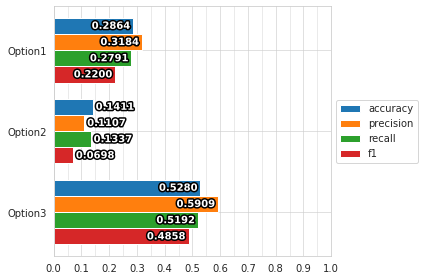

In [5]:
# Classifiction performance metrics by model
train_metadata_json = load_json('./results/multiple_experiment_Option1/model/train_set_metadata.json')
compare_classifiers_performance_from_pred(
  preds_list,
  test_df['label'].to_numpy().astype('int'),
  train_metadata_json,
  'label',
  10,
  model_names=models_list,
  output_directory='./viz2',
  file_format='png'
)

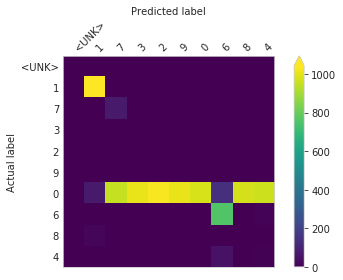

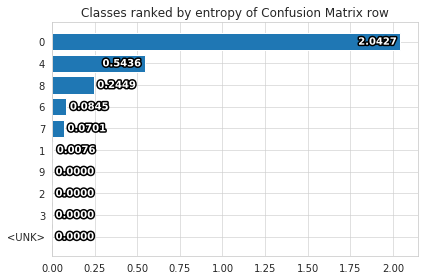

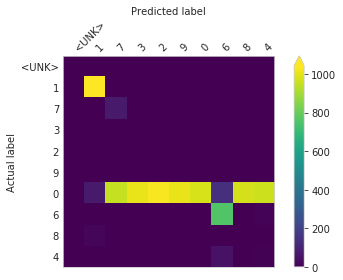

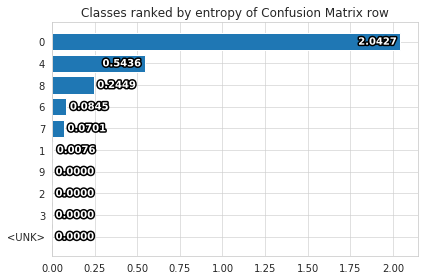

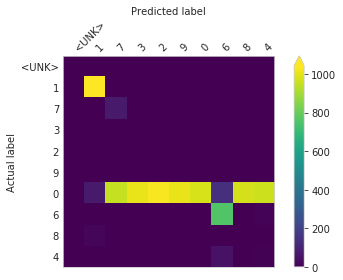

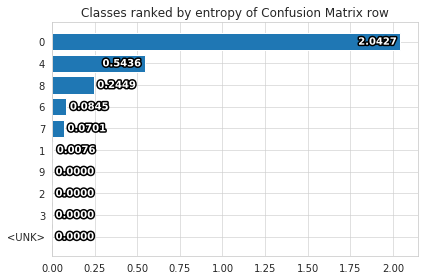

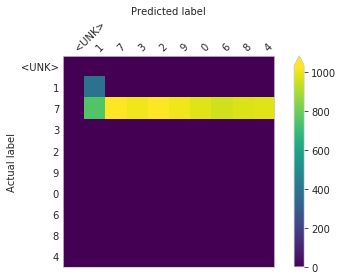

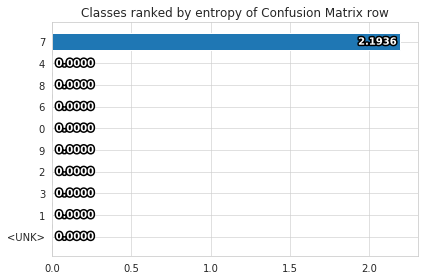

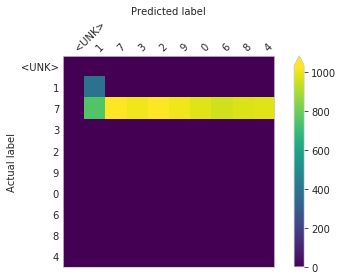

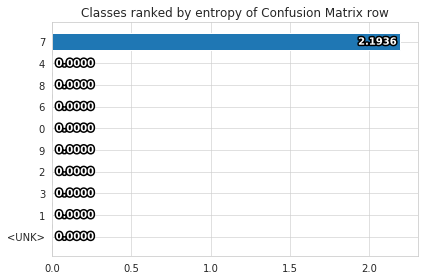

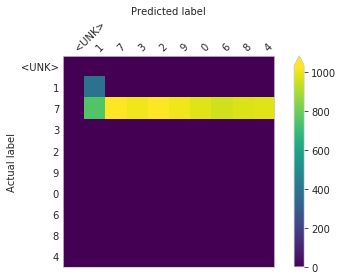

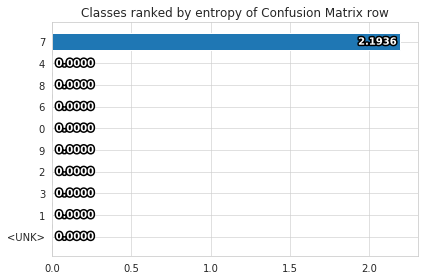

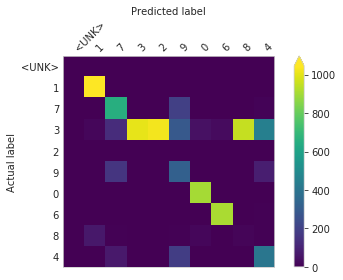

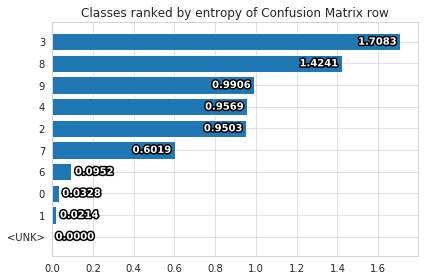

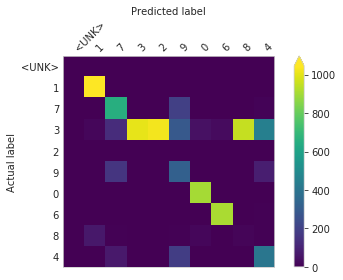

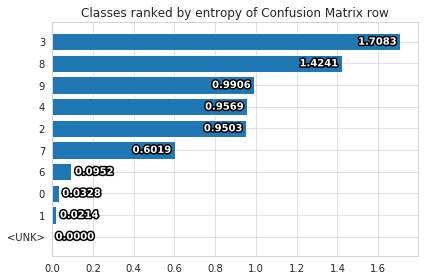

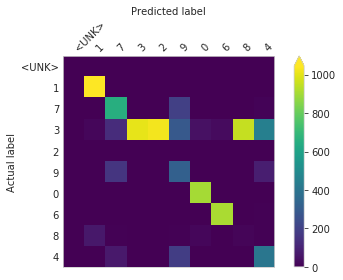

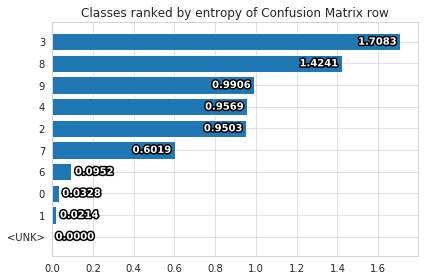

In [6]:
# Confustion matrix by model
confusion_matrix(
  test_stats_list,
  train_metadata_json,
  'label',
  [10,10,10],
  False,
  model_names=models_list,
  output_directory='./viz2',
  file_format='png'
)